In [1]:
import os
import pandas as pd
import seaborn as sns
import random

from datetime import datetime, date

In [2]:
data_folder = '../03.clean-data/'
positive_monthly_return_cutoff = 0.002

## Load Data

In [3]:
hpi = pd.read_csv(os.path.join(data_folder, 'hpi.csv'), parse_dates=['Date']) # Load
hpi.sort_values(['Area', 'Type', 'Date'], inplace=True) # Sort
hpi.reset_index(inplace=True)

In [4]:
hpi.dtypes

level_0             int64
index               int64
Area               object
Date       datetime64[ns]
Type               object
HPI               float64
dtype: object

In [5]:
housing_types = hpi['Type'].unique().tolist()
areas = hpi['Area'].unique().tolist()

## Get Monthly Changes ("Returns")

In [6]:
# "Return" refers to a monthly change over last month, used in financial and economic data sets often.
# In this case, it can be seen as "monthly return" on investment in real estate.

In [7]:
hpi_returns = hpi.copy()

In [8]:
hpi_returns['HPI.L1'] = hpi_returns.groupby(['Area', 'Type'])['HPI'].shift(1)
hpi_returns['HPI.L12'] = hpi_returns.groupby(['Area', 'Type'])['HPI'].shift(12)

In [9]:
idx = random.randint(0, len(hpi))
hpi_returns.sort_values(['Area', 'Type', 'Date'])[['Area', 'Type', 'Date', 'HPI', 'HPI.L1', 'HPI.L12']][idx:idx + 15]

,Area,Type,Date,HPI,HPI.L1,HPI.L12
5153,Newmarket,Townhouse,2019-06-01,223.7,223.9,227.8
5154,Newmarket,Townhouse,2019-07-01,226.3,223.7,228.5
5155,Newmarket,Townhouse,2019-08-01,225.2,226.3,228.3
5156,Newmarket,Townhouse,2019-10-01,226.3,225.2,227.8
5157,Newmarket,Townhouse,2019-11-01,231.7,226.3,223.9
5158,Newmarket,Townhouse,2019-12-01,232.5,231.7,226.2
5159,Newmarket,Townhouse,2020-01-01,237.3,232.5,222.6
5160,Newmarket,Townhouse,2020-02-01,240.4,237.3,225.6
5161,Newmarket,Townhouse,2020-03-01,243.5,240.4,225.2
5162,Newmarket,Townhouse,2020-04-01,238.6,243.5,221.8


In [10]:
hpi_returns['MonthlyChangeInHPI'] = (hpi_returns['HPI'] - hpi_returns['HPI.L1']) / hpi_returns['HPI.L1']
hpi_returns['YearlyChangeInHPI'] = (hpi_returns['HPI'] - hpi_returns['HPI.L12']) / hpi_returns['HPI.L12']

In [11]:
hpi_returns.sort_values(['Area', 'Type', 'Date'])[['Area', 'Type', 'Date', 'HPI', 'HPI.L1', 'MonthlyChangeInHPI', 'YearlyChangeInHPI']]

,Area,Type,Date,HPI,HPI.L1,MonthlyChangeInHPI,YearlyChangeInHPI
0,Adjala-Tosorontio,Apartment,2015-07-01,NaN,NaN,NaN,NaN
1,Adjala-Tosorontio,Apartment,2015-08-01,NaN,NaN,NaN,NaN
2,Adjala-Tosorontio,Apartment,2015-09-01,NaN,NaN,NaN,NaN
3,Adjala-Tosorontio,Apartment,2015-10-01,NaN,NaN,NaN,NaN
4,Adjala-Tosorontio,Apartment,2015-11-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
27080,Whitchurch-Stouffville,Townhouse,2020-12-01,250.9,254.8,-0.015306,0.112639
27081,Whitchurch-Stouffville,Townhouse,2021-01-01,249.6,250.9,-0.005181,0.086162
27082,Whitchurch-Stouffville,Townhouse,2021-02-01,261.8,249.6,0.048878,0.107445
27083,Whitchurch-Stouffville,Townhouse,2021-03-01,279.2,261.8,0.066463,0.163333


In [12]:
hpi_returns[(hpi_returns['Area'].str.startswith('Toronto')) & (hpi_returns['Date'] > pd.to_datetime(date(2021, 1, 1)))].groupby('Date')['MonthlyChangeInHPI'].mean()

Date
2021-02-01    0.031703
2021-03-01    0.038013
2021-04-01    0.024329
Name: MonthlyChangeInHPI, dtype: float64

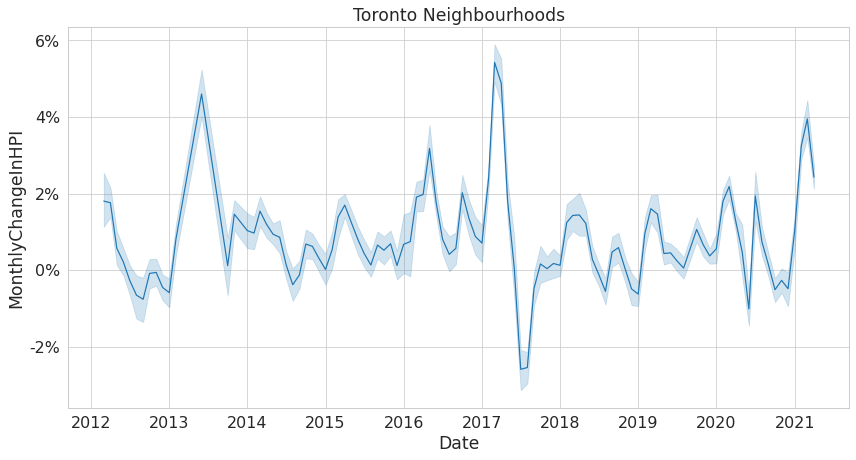

In [33]:
with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):
        ax = sns.lineplot(
            data=hpi_returns[(hpi_returns['Area'].str.startswith('Toronto')) & (hpi_returns['Type'] == 'Composite') & (hpi_returns['Date'] > datetime(2012, 1, 1))],
            x='Date',
            y='MonthlyChangeInHPI',
            estimator='mean'
        )
        ax.figure.set_figwidth(14)
        ax.figure.set_figheight(7)
        ax.set_title(f"Toronto Neighbourhoods")
        ax.yaxis.set_major_formatter(lambda x, pos: '{:}%'.format(round(x * 100)))
        ax.yaxis.set_major_formatter(lambda x, pos: '{:}%'.format(round(x * 100)))
        fig = ax.get_figure()

## What is the average return from real estate?

In [14]:
average_monthly_return = hpi_returns.query('Area == "TREB Total" & Type == "Composite"')['MonthlyChangeInHPI'].mean()
average_monthly_return

0.007301359295723676

In [15]:
# Annualization may NOT be appropriate in this case: we do not collect the return from real estate and re-invest every month.
average_annualized_return = ((1 + average_monthly_return) ** 12) - 1
average_annualized_return

0.09122181638033888

In [16]:
average_yearly_return = hpi_returns.query('Area == "TREB Total" & Type == "Composite"')['YearlyChangeInHPI'].mean()
average_yearly_return

0.09583392879756937

In [17]:
# Non-annualized yearly return.
average_monthly_return * 12

0.08761631154868411

In [18]:
# Ten year return annualied.
(1 + average_monthly_return * 120) ** (1/12) - 1

0.053834833042590846

In [19]:
hpi_returns.query('Area == "TREB Total" & Type == "Composite"')['MonthlyChangeInHPI'].describe()

count    86.000000
mean      0.007301
std       0.013264
min      -0.046494
25%       0.000149
50%       0.007248
75%       0.012355
max       0.062185
Name: MonthlyChangeInHPI, dtype: float64

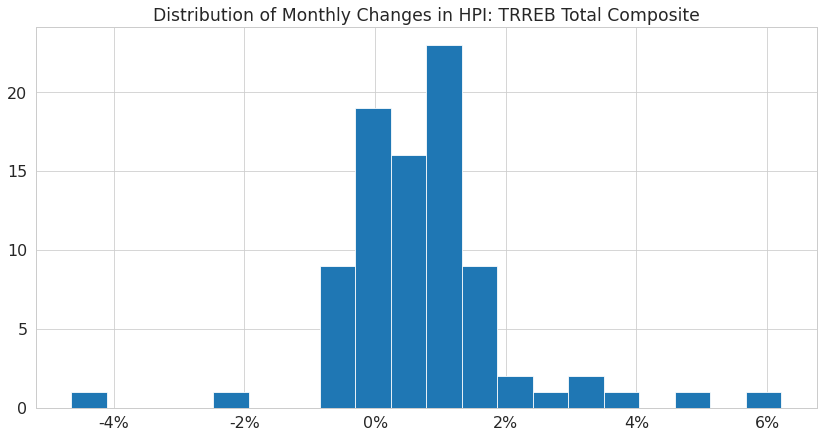

In [20]:
with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):
        ax = hpi_returns.query('Area == "TREB Total" & Type == "Composite"')['MonthlyChangeInHPI'].hist(bins=20, density=False)
        ax.figure.set_figwidth(14)
        ax.figure.set_figheight(7)
        ax.xaxis.set_major_formatter(lambda x, pos: '{:}%'.format(round(x * 100)))
        ax.set_title(f"Distribution of Monthly Changes in HPI: TRREB Total Composite")


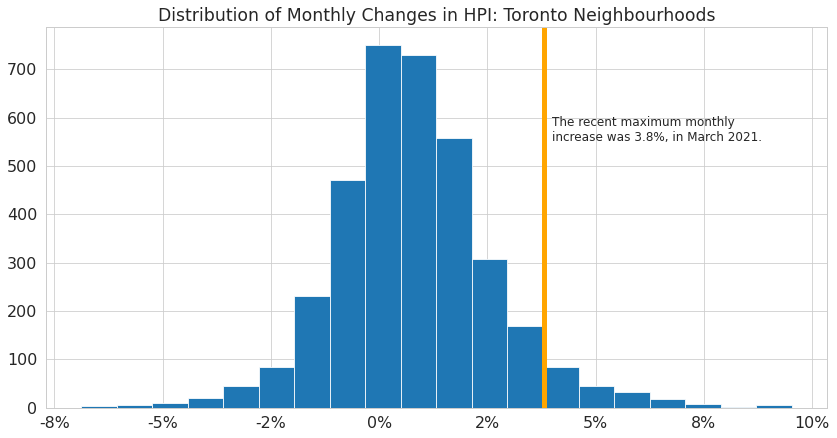

In [21]:
with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):
        ax = hpi_returns[(hpi_returns['Area'].str.startswith('Toronto')) & (hpi_returns['Type'] == 'Composite') & (hpi_returns['Date'] > datetime(2012, 1, 1))]['MonthlyChangeInHPI'].hist(bins=20, density=False)
        ax.figure.set_figwidth(14)
        ax.figure.set_figheight(7)
        ax.axvline(0.038013, color='orange', linewidth=5)
        ax.xaxis.set_major_formatter(lambda x, pos: '{:}%'.format(round(x * 100)))
        ax.annotate('The recent maximum monthly\nincrease was 3.8%, in March 2021.', xy=(0.04, 0.7 * ax.get_ylim()[1]), fontsize=12)
        ax.set_title(f"Distribution of Monthly Changes in HPI: Toronto Neighbourhoods")


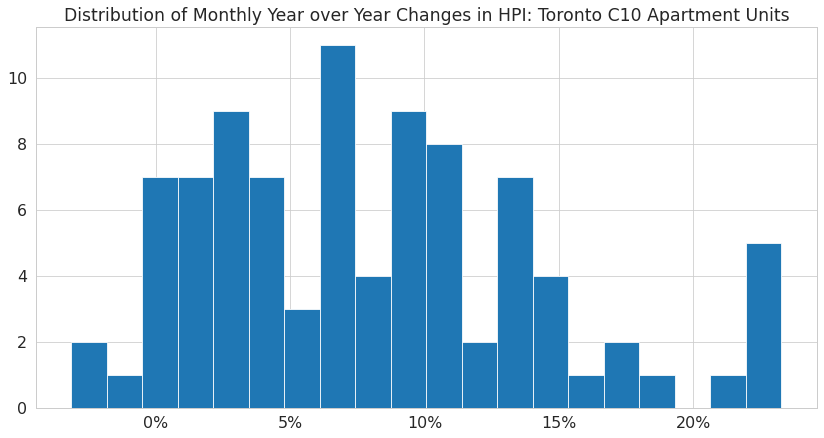

In [22]:
with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):
        ax = hpi_returns[(hpi_returns['Area'] == 'Toronto C10') & (hpi_returns['Type'] == 'Apartment') & (hpi_returns['Date'] > datetime(2012, 1, 1))]['YearlyChangeInHPI'].hist(bins=20, density=False)
        ax.figure.set_figwidth(14)
        ax.figure.set_figheight(7)
        ax.xaxis.set_major_formatter(lambda x, pos: '{:}%'.format(round(x * 100)))
        ax.set_title(f"Distribution of Monthly Year over Year Changes in HPI: Toronto C10 Apartment Units")


## What is the average return from real estate for a random area and housing type?

In [23]:
random_housing_type = random.choice(housing_types)
housing_type = random_housing_type
random_area = random.choice(areas)
area = random_area
area = 'Toronto C01'
housing_type = 'Single-Family Detached'

In [24]:
hpi_returns.query(f'Area == "{area}" & Type == "{housing_type}"')['MonthlyChangeInHPI'].describe()

count    102.000000
mean       0.006433
std        0.029054
min       -0.059145
25%       -0.015803
50%        0.008194
75%        0.027310
max        0.117492
Name: MonthlyChangeInHPI, dtype: float64

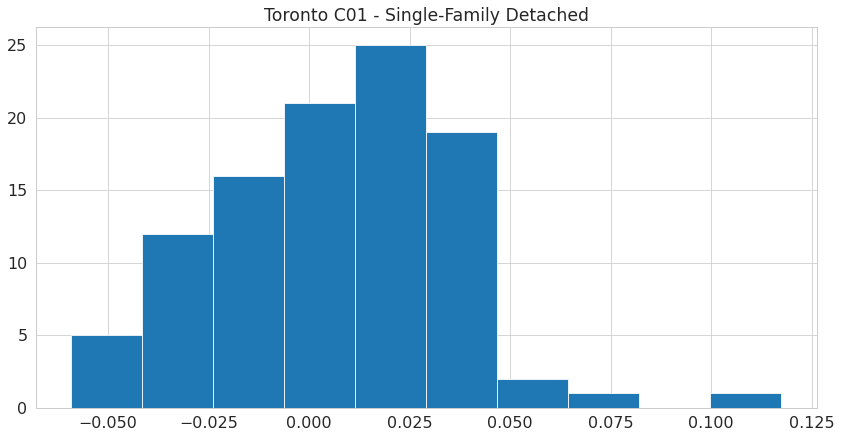

In [25]:
with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):
        ax = hpi_returns.query(f'Area == "{area}" & Type == "{housing_type}"')['MonthlyChangeInHPI'].hist()
        ax.figure.set_figwidth(14)
        ax.figure.set_figheight(7)
        ax.set_title(f"{area} - {housing_type}")


## What Percentange of the Time Does Real Estate Bring a Positive Return in a Given Month?

In [26]:
(
    (hpi_returns.query('Area == "TREB Total" & Type == "Composite"')['MonthlyChangeInHPI'] > positive_monthly_return_cutoff).sum()
        /
    len(hpi_returns[hpi_returns['MonthlyChangeInHPI'].notnull()].query('Area == "TREB Total" & Type == "Composite"'))
)

0.6627906976744186

## What is the Average Yearly Return for a Given Area & Housing Type?

In [27]:
average_yearly_return_by_area = hpi_returns.groupby(['Area', 'Type'])['YearlyChangeInHPI'].mean()
average_monthly_return_by_area = hpi_returns.groupby(['Area', 'Type'])['MonthlyChangeInHPI'].mean()
average_annualized_return_by_area = (((1 + average_monthly_return_by_area) ** 12) - 1).rename('AnnualizedMonthlyChangeInHPI')

In [28]:
average_yearly_return_by_area.describe()

count    286.000000
mean       0.098600
std        0.039644
min       -0.229423
25%        0.082197
50%        0.099009
75%        0.116029
max        0.227865
Name: YearlyChangeInHPI, dtype: float64

In [29]:
average_monthly_return_by_area.describe()

count    286.000000
mean       0.008456
std        0.003049
min       -0.018138
25%        0.007167
50%        0.008548
75%        0.009988
max        0.018445
Name: MonthlyChangeInHPI, dtype: float64

In [30]:
# Annualization does seem to be give figures similar to yearly returns, so I can use annualization.
# This earns my 11 extra data points for estimation for each area and housing type.
# Why are yearly returns important? Because monthly return figures are not intuitive for most audiences: They are small and not used in practice.
average_annualized_return_by_area.describe()

count    286.000000
mean       0.106971
std        0.038236
min       -0.197201
25%        0.089472
50%        0.107544
75%        0.126661
max        0.245228
Name: AnnualizedMonthlyChangeInHPI, dtype: float64

In [31]:
average_yearly_return_by_area.sample(5)

Area         Type                  
Orangeville  Composite                 0.134005
Vaughan      Single-Family Attached    0.072443
Uxbridge     Apartment                      NaN
Toronto W01  Single-Family Detached    0.075544
Burlington   Apartment                 0.068032
Name: YearlyChangeInHPI, dtype: float64

## What Percentange of the Time Does Real Estate Bring a Positive Return in a Given Month?
### (by Area and Housing Type)

In [32]:
(
    hpi_returns.groupby(['Area', 'Type'])['MonthlyChangeInHPI'].apply(lambda x: (x > positive_monthly_return_cutoff).sum())
        /
    hpi_returns[hpi_returns['MonthlyChangeInHPI'].notnull()].groupby(['Area', 'Type']).apply(len)
)

Area                    Type                  
Adjala-Tosorontio       Apartment                      NaN
                        Composite                 0.705882
                        Single-Family Attached         NaN
                        Single-Family Detached    0.705882
                        Townhouse                      NaN
                                                    ...   
Whitchurch-Stouffville  Apartment                 0.444444
                        Composite                 0.661765
                        Single-Family Attached    0.647059
                        Single-Family Detached    0.647059
                        Townhouse                 0.488889
Length: 305, dtype: float64